# Random forest use example

In [2]:
import sys
sys.path.append('..')  # Add parent directory to sys.path for module imports

import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from RandomForest import RandomForest
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

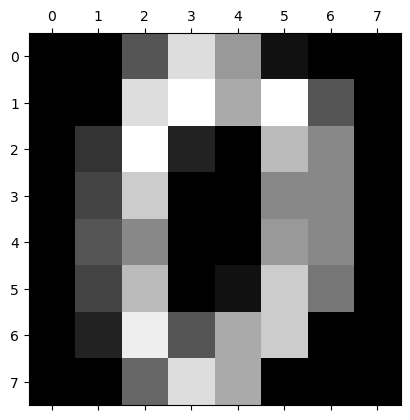

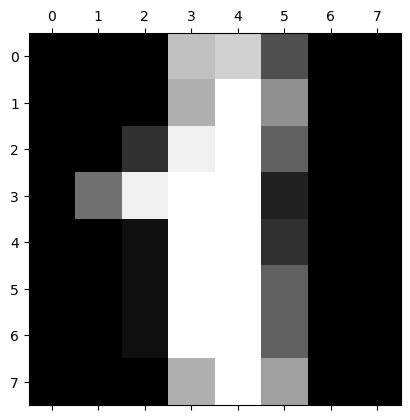

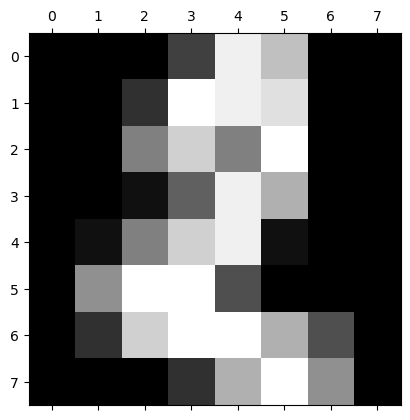

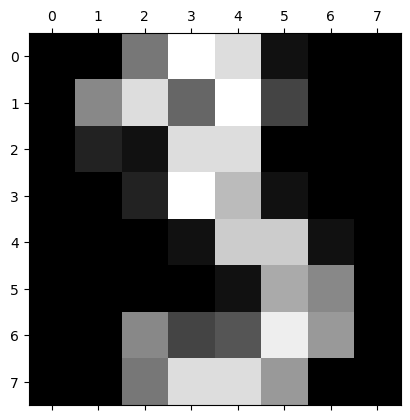

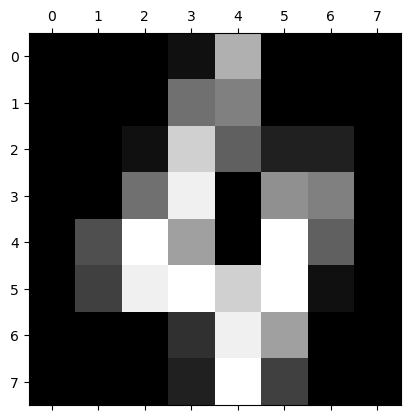

In [3]:
digits = load_digits()
plt.gray()
for i in range(5):
    plt.matshow(load_digits().images[i])
    plt.show()

In [4]:
df =pd.DataFrame(load_digits().data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis='columns'), digits.target, test_size=0.2)

In [6]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [7]:
import numpy as np

model = RandomForest(n_trees=10, min_samples_split=2, max_depth=10)
model.fit(np.asarray(X_train), np.asarray(y_train))

model.score(np.asarray(X_test), np.asarray(y_test))

0.9361111111111111

In [10]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(np.asarray(X_test))
cm = confusion_matrix(y_test, y_predicted)

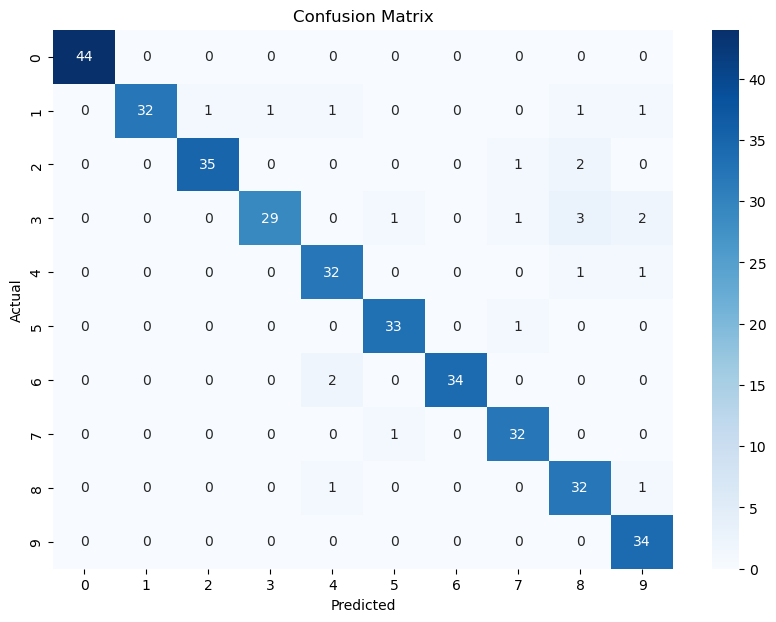

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Most frequent errors

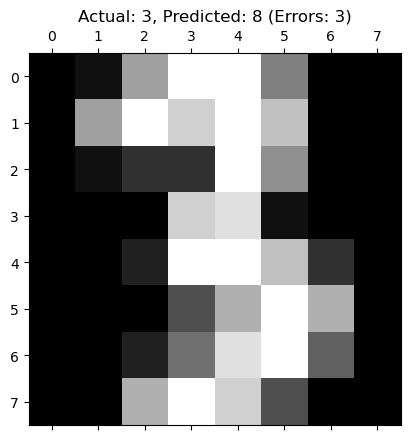

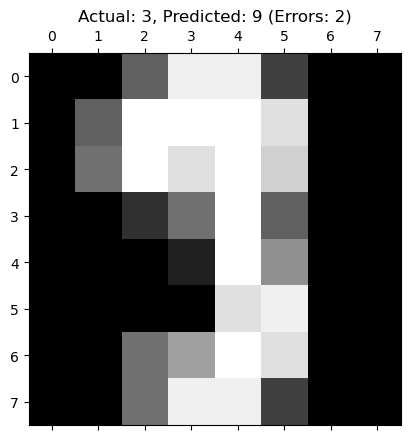

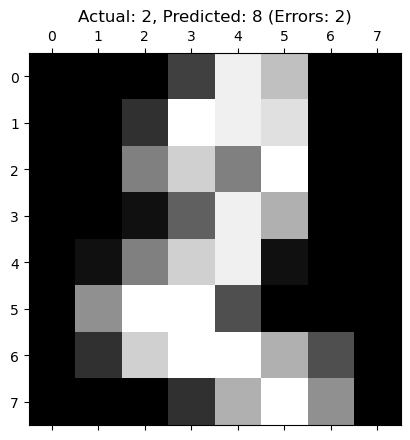

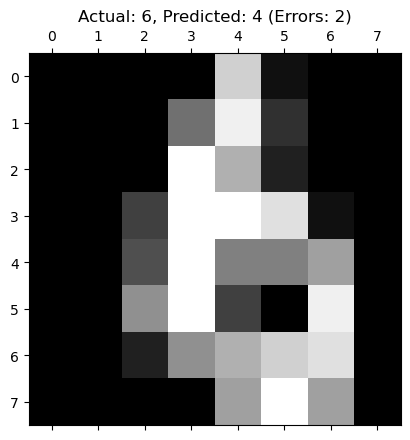

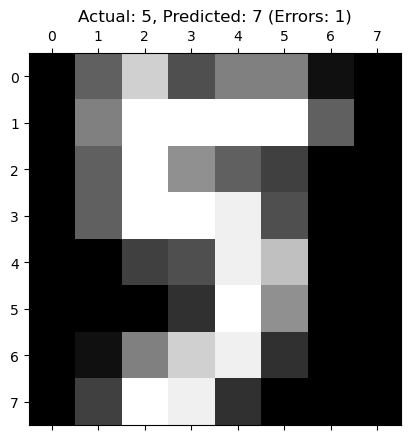

In [21]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Convert to numpy arrays for safe integer indexing
X_test_arr = np.asarray(X_test)
y_test_arr = np.asarray(y_test)

# Collect all misclassified digits as (true, predicted) pairs
error_pairs = [(y_test_arr[i], y_predicted[i]) for i in range(len(y_predicted)) if y_predicted[i] != y_test_arr[i]]

# Count frequency of each (true, predicted) error
error_counter = Counter(error_pairs)
most_common_errors = error_counter.most_common(5)

# Display the first 5 most frequent error types
for (true_digit, pred_digit), count in most_common_errors:
    # Find the first occurrence of this error type
    for i in range(len(y_predicted)):
        if y_test_arr[i] == true_digit and y_predicted[i] == pred_digit:
            plt.matshow(X_test_arr[i].reshape(8, 8), cmap='gray')
            plt.title(f'Actual: {true_digit}, Predicted: {pred_digit} (Errors: {count})')
            plt.show()
            break

### Comparing with scikit.learn RandomForestClassifier

In [23]:
# comparing with scikit.learn RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_sklearn = RandomForestClassifier(n_estimators=10, min_samples_split=2, max_depth=10)
rf_sklearn.fit(X_train, y_train)
rf_sklearn.score(X_test, y_test)

0.9583333333333334